In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
import pickle
from sklearn.externals import joblib
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import os 

   S3D-IO    50-50-100-2-2-4-1   526.27  0.03  0.06   66.03  0.15  2.31  0.05  \
0  S3D-IO  100-200-200-2-4-4-1  1089.66  0.48  0.45  778.57  1.43  1.88  0.07   
1  S3D-IO     50-50-50-2-2-2-1    73.56  0.02  0.21  354.61  0.04  0.13  0.04   
2  S3D-IO    50-50-100-2-2-4-1   483.04  0.03  0.06  336.28  0.15  0.45  0.06   
3  S3D-IO  100-100-100-2-4-4-1   200.81  0.12  0.61  388.38  0.36  0.94  0.10   
4  S3D-IO   50-100-100-2-2-4-1   344.12  0.06  0.18   55.24  0.30  5.53  0.10   

   0.01   196608  12   enable enable.1 enable.2  disable  478150656  
0  0.03  2097152   5  disable  disable  disable   enable  148897792  
1  0.01   327680   2  disable   enable  disable  disable  482344960  
2  0.02  1310720  20  disable  disable   enable  disable  629145600  
3  0.03  1114112   1   enable  disable  disable   enable  415236096  
4  0.03   131072   8   enable  disable   enable   enable  243269632  


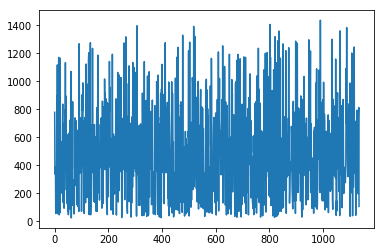

In [355]:
data = pd.read_csv('../stats.txt', delim_whitespace=True)
data = data.sample(frac=1).reset_index(drop=True)
print(data.head(5))
data.iloc[:,5].plot()
modelfile = 'final.sav'

In [356]:
array = data.values

print(data.head())
print(data.shape)
data.columns=['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14','col15','col16','col17']
z = data['col2'].str.split('-')
print(z.head())
data['col13']=data['col13'].eq("enable").mul(1)
data['col14']=data['col14'].eq("enable").mul(1)
data['col15']=data['col15'].eq("enable").mul(1)
data['col16']=data['col16'].eq("enable").mul(1)

   S3D-IO    50-50-100-2-2-4-1   526.27  0.03  0.06   66.03  0.15  2.31  0.05  \
0  S3D-IO  100-200-200-2-4-4-1  1089.66  0.48  0.45  778.57  1.43  1.88  0.07   
1  S3D-IO     50-50-50-2-2-2-1    73.56  0.02  0.21  354.61  0.04  0.13  0.04   
2  S3D-IO    50-50-100-2-2-4-1   483.04  0.03  0.06  336.28  0.15  0.45  0.06   
3  S3D-IO  100-100-100-2-4-4-1   200.81  0.12  0.61  388.38  0.36  0.94  0.10   
4  S3D-IO   50-100-100-2-2-4-1   344.12  0.06  0.18   55.24  0.30  5.53  0.10   

   0.01   196608  12   enable enable.1 enable.2  disable  478150656  
0  0.03  2097152   5  disable  disable  disable   enable  148897792  
1  0.01   327680   2  disable   enable  disable  disable  482344960  
2  0.02  1310720  20  disable  disable   enable  disable  629145600  
3  0.03  1114112   1   enable  disable  disable   enable  415236096  
4  0.03   131072   8   enable  disable   enable   enable  243269632  
(1135, 17)
0    [100, 200, 200, 2, 4, 4, 1]
1       [50, 50, 50, 2, 2, 2, 1]
2      [50, 50, 

In [357]:
X = pd.DataFrame(z.tolist())
X = X.drop(6, 1)

#FEATURES
X['cb3']=data['col13']
X['cb4']=data['col14']
#X['cb5']=data['col15']
#X['cb6']=data['col16']
X['cb1']=data['col11']
X['cb2']=data['col12']
X['cb7']=data['col17']
X['ratio1'] = X.iloc[:,0].astype(int)/(X.iloc[:,3].astype(int))
X['ratio2'] = X.iloc[:,1].astype(int)/(X.iloc[:,4].astype(int))
X['ratio3'] = X.iloc[:,2].astype(int)/(X.iloc[:,5].astype(int))

#NORMALIZING 
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X.values)
X = pd.DataFrame(X_scaled)

print(type(X))
print(X.head())
X_total = X
#pd.options.display.max_rows=  1500


<class 'pandas.core.frame.DataFrame'>
         0         1         2    3    4         5    6    7         8   \
0  0.142857  0.428571  0.200000  0.0  1.0  0.333333  0.0  0.0  0.001751   
1  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  1.0  0.000274   
2  0.000000  0.000000  0.066667  0.0  0.0  0.333333  0.0  0.0  0.001095   
3  0.142857  0.142857  0.066667  0.0  1.0  0.333333  1.0  0.0  0.000930   
4  0.000000  0.142857  0.066667  0.0  0.0  0.333333  1.0  0.0  0.000109   

         9         10        11        12        13  
0  0.010309  0.138371  0.142857  0.142857  0.142857  
1  0.004124  0.450442  0.000000  0.000000  0.000000  
2  0.041237  0.587831  0.000000  0.000000  0.000000  
3  0.002062  0.387635  0.142857  0.000000  0.000000  
4  0.016495  0.226693  0.000000  0.142857  0.000000  


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [358]:
Y = data['col6']
#Y = ((data['col7'])*1024)/data['col6'] + (data['col4']*1024)/data['col3']
Y=Y.values
Y = Y.astype(int)
print(Y[0:5])
import xgboost as xgb
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X_total,Y,test_size=0.7,random_state = 42) 
y = train_Y
X = train_X
print(X[0:5])
print(y.shape, X.shape)
print(y[0:5])



[778 354 336 388  55]
           0         1         2    3    4         5    6    7         8   \
480  0.000000  0.142857  0.066667  0.0  0.0  0.333333  1.0  1.0  0.000055   
283  0.428571  0.428571  0.466667  0.0  0.0  0.333333  1.0  1.0  0.000164   
902  0.000000  0.142857  0.066667  0.0  0.0  0.333333  0.0  1.0  0.000109   
991  1.000000  1.000000  0.466667  0.0  1.0  0.333333  1.0  1.0  0.007334   
824  0.000000  0.142857  0.066667  0.0  0.0  0.333333  1.0  0.0  0.000055   

           9         10        11        12        13  
480  0.002062  0.455348  0.000000  0.142857  0.000000  
283  0.016495  0.222767  0.428571  0.428571  0.428571  
902  0.018557  0.354269  0.000000  0.142857  0.000000  
991  0.111340  0.457311  1.000000  0.428571  0.428571  
824  0.024742  0.340530  0.000000  0.142857  0.000000  
(340,) (340, 14)
[367 700 211 795  33]


In [359]:
xgb_model =xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X, y)
y_pred = xgb_model.predict(test_X)

mse=mean_squared_error(test_Y, y_pred)
print(np.sqrt(mse))

# xgdmat = xgb.DMatrix(X,y)
# our_params = {'eta': 0.1, 'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
# final_gb=xgb.train(our_params,xgdmat)

116.93768836972903


In [360]:
# tesdmat = xgb.DMatrix(test_X)
# final_gb.predict(test_X)

In [361]:
#print(test_Y)
from sklearn.metrics import r2_score
r2_score(test_Y,y_pred)

0.87054037118784

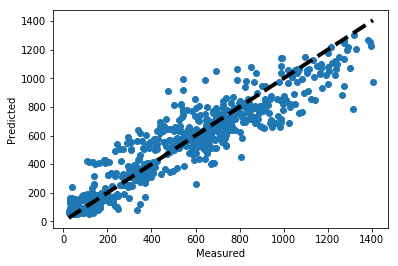

In [362]:
fig, ax = plt.subplots()
ax.scatter(test_Y, y_pred)
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [363]:
# save the model to disk

modelfile = 'finalxgb.sav'
joblib.dump(xgb_model, open(modelfile, 'wb'))
scaler_filename = "scalerxgb.save"
joblib.dump(min_max_scaler, scaler_filename) 


['scalerxgb.save']

In [364]:
import json
with open('/home/dsinghvi/sem8/parallel/project/CS633-2018-19-2-project/progress/confex.json') as f:
    data = json.load(f)

romio_ds_read = data["mpi"]["romio_ds_read"] == "enable"
romio_ds_write = data["mpi"]["romio_ds_write"] == "enable"
romio_cb_read = data["mpi"]["romio_cb_read"]
romio_cb_write = data["mpi"]["romio_cb_write"]
cb_buffer_size = data["mpi"]["cb_buffer_size"]
stripe_size = data["lfs"]["setstripe"]["size"]
stripe_count = data["lfs"]["setstripe"]["count"]

col_names =  ['cb5','cb6','cb7','cb8','cb8','cb10','cb11','cb12']
cb_df  = pd.DataFrame(columns = col_names)
cb_df.loc[len(cb_df)] = [romio_ds_read,romio_ds_write,stripe_size, stripe_count, cb_buffer_size,"50","50","50"]


scaler_filename = "scalerxgb.save"
scaler = joblib.load(scaler_filename)
xgb_model = joblib.load(modelfile)

print(test_X.head(1))


col_names =  ['f0','1', '2','3','4','5']
my_df = pd.DataFrame(columns=col_names)
my_df.loc[len(my_df)] = [100,100,100,2,2,4]

x = pd.concat([my_df,cb_df], axis=1)
norm_df = pd.DataFrame(scaler.transform(x))
print(norm_df)

           0    1         2    3    4         5    6    7         8   \
784  0.142857  1.0  0.466667  0.0  1.0  0.333333  0.0  1.0  0.023753   

           9        10        11        12        13  
784  0.018557  0.38371  0.142857  0.428571  0.428571  
         0         1         2    3    4         5    6    7         8    9   \
0  0.142857  0.142857  0.066667  0.0  0.0  0.333333  1.0  0.0  0.001806  0.0   

        10        11        12        13  
0  0.07949  0.142857  0.142857  0.142857  


In [365]:
xgb_model.predict(norm_df)

array([376.69833], dtype=float32)

In [ ]:
x


In [ ]:
test_X.head(1)

In [ ]:
trees.predict(test_X.head(1))